In [22]:
import pandas as pd
import numpy as np
import datetime as dt
import sklearn as sk
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
readmit_model1 = pd.read_csv(r'C:\Users\brthompson\bt_school\data\interim\readmit_model1.csv')
readmit_model2 = pd.read_csv(r'C:\Users\brthompson\bt_school\data\interim\secondmodel_readmit.csv')


In [3]:
readmit_model1.shape

(73490, 126)

In [4]:
readmit_model2.shape

(73490, 129)

In [5]:
#Split dependent and independent variables
Xad = readmit_model1.drop(['readmit'], 1) #Features
Yad = readmit_model1['readmit'] #Target variable
Xad.shape

(73490, 125)

In [6]:
Yad.shape

(73490,)

In [7]:
#Split the data into training and test, keep test set aside for testing of models. 
#Will perform cross validation on training set
X_train,X_test,y_train,y_test=train_test_split(Xad,Yad,test_size=0.25,random_state=0)


In [8]:
logreg = LogisticRegressionCV(cv=5)

In [24]:
def modelrun(model, xtrain, ytrain, xtest, ytest):
    start = time.time()
    model.fit(xtrain, ytrain)
    y_pred=model.predict(xtest)
    print(' ')
    print("Confusion Matrix:",metrics.confusion_matrix(ytest, y_pred))
    print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
    print("Precision:",metrics.precision_score(ytest, y_pred))
    print("Recall:",metrics.recall_score(ytest, y_pred))
    y_pred_proba = model.predict_proba(xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
    auc = metrics.roc_auc_score(ytest, y_pred_proba)
    plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    print('MCC:')
    print(matthews_corrcoef(ytest, y_pred))
    elapsed = time.time() - start
    print("Time to run",elapsed)

In [ ]:
modelrun(model = logreg, xtrain=X_train, ytrain=y_train, xtest = X_test, ytest=y_test)

In [13]:
crossvalrun(model = logreg, xtrain=X_train, ytrain=y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", Convergenc

 
Confusion Matrix: [[25603  6820]
 [ 8118 14576]]
Accuracy: 0.7289765408131792
Precision: 0.6812488315573004
Recall: 0.64228430422138


NotFittedError: Call fit before prediction

In [ ]:
#Now conduct decision tree model
#Use cross-validation for hyperparamter tuning - choose the best max_depth
#Use only the training set for the cross-validation parameter tuning
depth = []
for i in range(3, 50):

    clf = DecisionTreeClassifier(max_depth=i) 
    scores = cross_val_score(estimator=clf, X = X_train, y = y_train, cv = 5, n_jobs = 4)
    depth.append((i, scores.mean()))
print(depth)
pd.DataFrame(depth, columns = ['max_depth', 'score']).set_index('max_depth').plot()
#For initial set of variables, stabilized around 20
#Closer to 15 for larger set of variables

In [15]:
clf_tree = DecisionTreeClassifier(max_depth=15) 

Time to train 0.4440000057220459
 
Confusion Matrix: [[8400 2437]
 [2689 4847]]
Accuracy: 0.7210036466554183
Precision: 0.6654310818231741
Recall: 0.6431794055201698


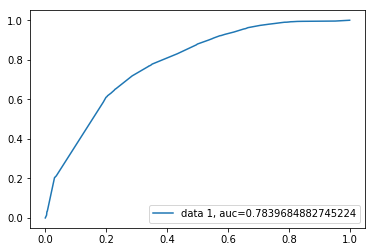

MCC:
0.4206137071928079


In [20]:
modelrun(model = clf_tree, xtrain=X_train, ytrain=y_train, xtest = X_test, ytest=y_test)

Time to train 0.4509999752044678
 
Confusion Matrix: [[8548 2289]
 [2808 4728]]
Accuracy: 0.7225820497469112
Precision: 0.6737922188969645
Recall: 0.6273885350318471


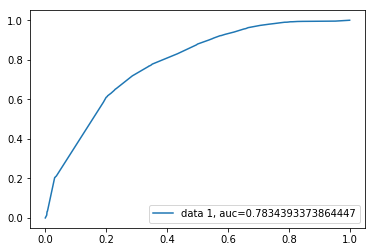

MCC:
0.4213130776373619


In [19]:
crossvalrun(model = clf_tree, xtrain=X_train, ytrain=y_train, xtest=X_test, ytest=y_test)

[(50, 0.7284868583671057), (60, 0.7283417320070881), (70, 0.7283417320067895), (80, 0.7283054442448371), (90, 0.7282872641518148), (100, 0.7281965776672747), (110, 0.727942571561678), (120, 0.7278518521567973), (130, 0.7279062640477006), (140, 0.728051415096107), (150, 0.727942563331817), (160, 0.7278881234590273), (170, 0.727924412867131), (180, 0.7279969850990313), (190, 0.7282147034423772), (200, 0.7283417089639547), (210, 0.7283417056710546), (220, 0.7282146935657673), (230, 0.7282872608604081), (240, 0.7280876962740509)]


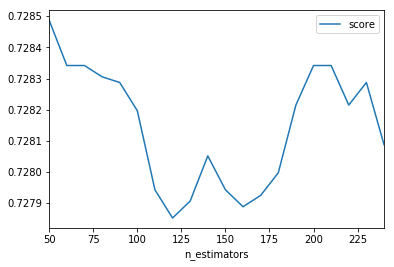

In [35]:
#Now run a boosted decision tree, first performing cross validation to find ideal 
#number of estimators
#Use only the training set for the cross-validation

estimators = []
for i in range(50, 250, 10):

    clf = AdaBoostClassifier(base_estimator = clf_tree, random_state=0, n_estimators = i) 
    scores = cross_val_score(estimator=clf, X = X_train, y = y_train, cv = 5, n_jobs = 4)
    estimators.append((i, scores.mean()))
print(estimators)
pd.DataFrame(estimators, columns = ['n_estimators', 'score']).set_index('n_estimators').plot()

#max score achieved with 50 estimators

 
Confusion Matrix: [[8498 2339]
 [2586 4950]]
Accuracy: 0.7319436129102488
Precision: 0.6791055014405268
Recall: 0.6568471337579618


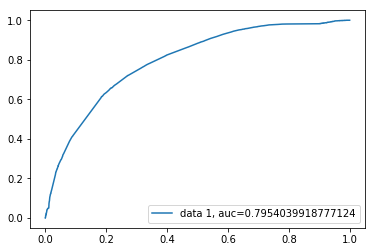

MCC:
0.4433979086932805
Time to run 25.64299988746643


In [36]:
booster = AdaBoostClassifier(base_estimator = clf_tree, random_state=0, n_estimators = 50) 
modelrun(model = booster, xtrain=X_train, ytrain=y_train, xtest = X_test, ytest=y_test)

[(50, 0.7296661645490663), (60, 0.7299020103127699), (70, 0.730047167944886), (80, 0.7298838911225719), (90, 0.7297387285505083), (100, 0.7302467308868835), (110, 0.7303737578066377), (120, 0.7302104398314339), (130, 0.7300834672298983), (140, 0.73010158148433), (150, 0.730156006542354), (160, 0.7301197401782796), (170, 0.7302648632442025), (180, 0.7303918983938178), (190, 0.7300290322952644), (200, 0.7303918885181038), (210, 0.7301015732538715), (220, 0.7298112760940196), (230, 0.730228588651163), (240, 0.7306277622648883)]


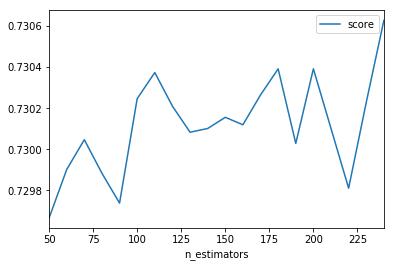

In [37]:
#now run random forest
#Start by performing grid search with cross validation to determine maxmimum 
#number of estimators and sample split
#Use only the training data for cross-validation parameter selection

estimators = []
for i in range(50, 250, 10):

    clf = RandomForestClassifier(n_estimators=i, criterion = 'entropy') 
    scores = cross_val_score(estimator=clf, X = X_train, y = y_train, cv = 5, n_jobs = 4)
    estimators.append((i, scores.mean()))
print(estimators)
pd.DataFrame(estimators, columns = ['n_estimators', 'score']).set_index('n_estimators').plot()
#Not much difference in number of estimators. Use 100

[(80, 0.7309180248579494), (90, 0.7309180297961051), (100, 0.7304281713427964), (110, 0.7302104414787799), (120, 0.7308091632179454), (130, 0.7304644196001011), (140, 0.7306640483783001), (150, 0.7313171968249262), (160, 0.7311901764885832), (170, 0.730936178613445), (180, 0.7308998710985716), (190, 0.7303918720556937)]


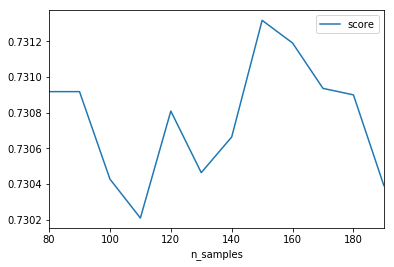

In [38]:
#Repeat for number of min samples
samples=[]
for i in range(80, 200, 10):

    clf = RandomForestClassifier(n_estimators=50, criterion = 'entropy', min_samples_split = i) 
    scores = cross_val_score(estimator=clf, X = X_train, y = y_train, cv = 5, n_jobs = 4)
    samples.append((i, scores.mean()))
print(samples)
pd.DataFrame(samples, columns = ['n_samples', 'score']).set_index('n_samples').plot()
#Best around 150

In [39]:
clf_forest = RandomForestClassifier(n_estimators=100, criterion = 'entropy', min_samples_split = 150)

 
Confusion Matrix: [[8618 2219]
 [2665 4871]]
Accuracy: 0.7341751483154629
Precision: 0.6870239774330043
Recall: 0.646364118895966


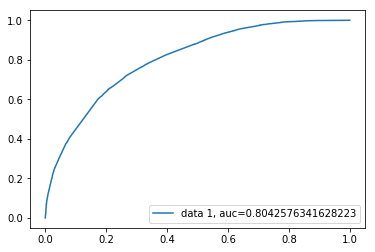

MCC:
0.44619145028257634
Time to run 12.184000015258789


In [40]:
modelrun(model = clf_forest, xtrain=X_train, ytrain=y_train, xtest = X_test, ytest=y_test)

In [41]:
##Now repeat entire process for second set of models (includes social data)
Xad2 = readmit_model2.drop(['readmit'], 1) #Features
Yad2 = readmit_model2['readmit'] #Target variable
Xad2.shape, Yad2.shape

((73490, 128), (73490,))

In [42]:
X_train2,X_test2,y_train2,y_test2=train_test_split(Xad2,Yad2,test_size=0.25,random_state=0)

 
Confusion Matrix: [[9688 1149]
 [5402 2134]]
Accuracy: 0.6434441844010232
Precision: 0.6500152299725861
Recall: 0.28317409766454354


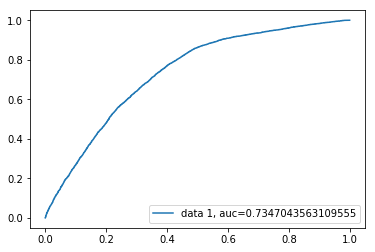

MCC:
0.22744807436241227
Time to run 4.801000356674194


In [43]:
modelrun(model =logreg, xtrain=X_train2, ytrain=y_train2, xtest = X_test2, ytest=y_test2)

 
Confusion Matrix: [[8789 2048]
 [2202 5334]]
Accuracy: 0.7686823055570674
Precision: 0.7225684096450826
Recall: 0.7078025477707006


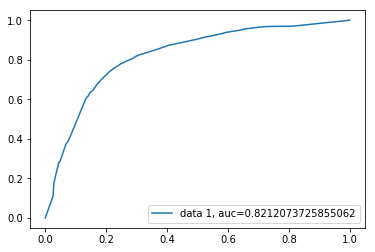

MCC:
0.5205187348243291
Time to run 0.8039999008178711


In [44]:
modelrun(model =clf_tree, xtrain=X_train2, ytrain=y_train2, xtest = X_test2, ytest=y_test2)

 
Confusion Matrix: [[8407 2430]
 [2189 5347]]
Accuracy: 0.7485984869101399
Precision: 0.6875401825896875
Recall: 0.7095276008492569


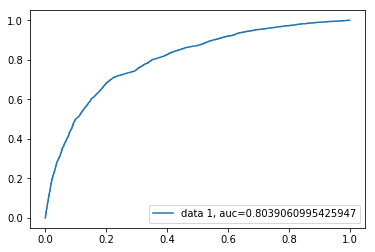

MCC:
0.48311941657790025
Time to run 37.124199867248535


In [45]:
modelrun(model = booster, xtrain=X_train2, ytrain=y_train2, xtest = X_test2, ytest=y_test2)

 
Confusion Matrix: [[8975 1862]
 [2130 5406]]
Accuracy: 0.7827246503020737
Precision: 0.7438084755090809
Recall: 0.7173566878980892


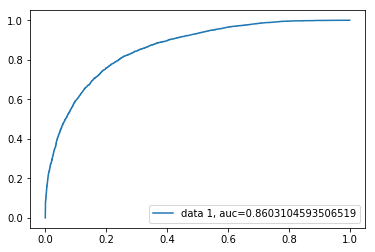

MCC:
0.5487609299816476
Time to run 14.44100022315979


In [46]:
modelrun(model =clf_forest, xtrain=X_train2, ytrain=y_train2, xtest = X_test2, ytest=y_test2)